In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import linear_model
from sklearn import metrics


In [2]:
data = pd.read_csv('car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [4]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


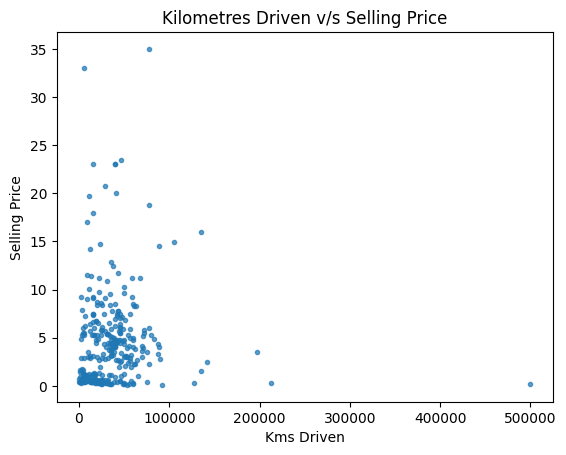

In [6]:
# Creating a Scatter plot to visulaize how Selling_Price varies with Kms_Driven

plt.scatter(data.Kms_Driven, data.Selling_Price, alpha = 0.7, marker='.')
plt.title("Kilometres Driven v/s Selling Price")
plt.xlabel("Kms Driven")
plt.ylabel("Selling Price")
plt.show()

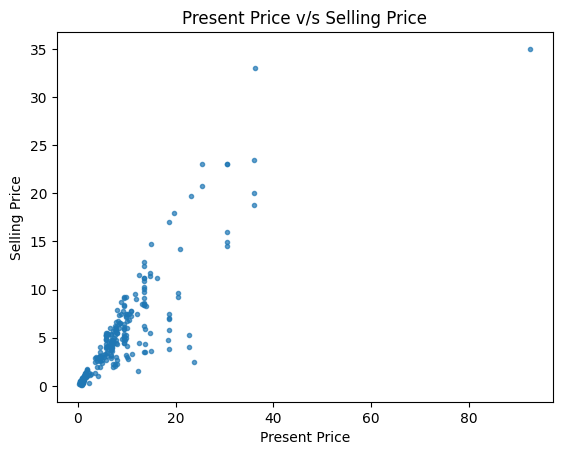

In [7]:
# Creating a Scatter plot to visulaize how Selling_Price varies with Present_Price

plt.scatter(data.Present_Price, data.Selling_Price, alpha = 0.7, marker='.')
plt.title("Present Price v/s Selling Price")
plt.xlabel("Present Price")
plt.ylabel("Selling Price")
plt.show()

In [8]:
# Preparing the dataset:

print(data.Fuel_Type.value_counts(),"\n")
print(data.Seller_Type.value_counts(),"\n")
print(data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64 

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64 

Manual       261
Automatic     40
Name: Transmission, dtype: int64


since the values of these columns are words(/string). We have to convert them to numerical values inorder to feed them to the model

We are going to use LabelEncoder from sklearn https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [9]:
from sklearn.preprocessing import LabelEncoder
fuel_encoder=LabelEncoder() # Encoding fuel Column
data["Fuel_Type"]=fuel_encoder.fit_transform(data.Fuel_Type) #Fit label encoder and return encoded labels
#inverse_transform ->Transform labels back to original encoding. E.g, fuel_encoder.inverse_transform(data.Fuel_Type)

In [10]:
data.head() # Fuel_Type column changed to numerical values

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,2,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,2,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,1,Dealer,Manual,0


In [11]:
seller_en=LabelEncoder()
data["Seller_Type"]= seller_en.fit_transform(data["Seller_Type"])

In [14]:
trmn_en=LabelEncoder()
data["Transmission"]=1

In [15]:
data.head() # Check if all the columns have numerical values (except car_name)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [35]:
y= data.Selling_Price.values # Select the selling price as y
x=data.drop(["Selling_Price","Car_Name"],axis=1)

In [39]:
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,2,0,1,0
1,2013,9.54,43000,1,0,1,0
2,2017,9.85,6900,2,0,1,0
3,2011,4.15,5200,2,0,1,0
4,2014,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,1,0
297,2015,5.90,60000,2,0,1,0
298,2009,11.00,87934,2,0,1,0
299,2017,12.50,9000,1,0,1,0


In [40]:
from sklearn.model_selection import train_test_split

# Check the shapes of the arrays
print("x train shape:", x_train.shape)
print("x test shape:", x_test.shape)
print("y train shape:", y_train.shape)
print("y test shape:", y_test.shape)


x train shape: (120, 9)
x test shape: (181, 9)
y train shape: (120,)
y test shape: (181,)


In [41]:
# TRAINING THE MODEL :

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=42)


In [42]:
# Using linear regression:

x_train = np.asarray(x_train)  # convert x_train to a numpy array
y_train = np.asarray(y_train)  # convert y_train into a numpy array


lr = linear_model.LinearRegression()  # creates linear regression model,  linear_model imported from sklearn
lr.fit(x_train, y_train)


LinearRegression()

In [43]:
# more ranking value = more contribution of variable in prediction

def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [44]:
# Convert x_test and x_train to numpy arrays
x_test = np.asarray(x_test)
x_train = np.asarray(x_train)

predictions = lr.predict(x_test)
test_error = metrics.mean_absolute_error(y_test, predictions) # imported from sklearn
print("Mean absolute error on test set", test_error)

predictions = lr.predict(x_train)
train_error = metrics.mean_absolute_error(y_train, predictions) # imported from sklearn
print("Mean absolute error on training set", train_error)

#The error message you encountered suggests that the np.matrix object is not supported in the predict method of the linear regression model. The error specifically asks you to convert the np.matrix object to a numpy array using np.asarray before passing it to the predict method.

Mean absolute error on test set 1.4413559567641923
Mean absolute error on training set 0.9668442218467452


In [45]:
# PREDICTION: 

index=4  # change index to see how it performs on other examples
check = x_train[index]
check= np.array(check).reshape(1,-1)

print("Predicted value: ", lr.predict(check))
print("True value: ", y_train[index])

Predicted value:  [2.68981226]
True value:  2.25


In [46]:
# Checking Prediction for car:

# change the following values accordingly as per your car:

Year            =  2014
Present_Price   =  5.59
Kms_Driven      = 27000
Fuel_Type       =     2
Seller_Type     =     0
Transmission    =     1
Owner           =     0

In [47]:
my_car=np.array([Year, Present_Price, Kms_Driven ,Fuel_Type ,Seller_Type ,Transmission ,Owner])

In [48]:
print("predicted Value:",lr.predict(my_car.reshape(1,-1))) #Predicting the value

predicted Value: [3.83977053]
